What is "Fake News"?
“Fake news” is a term that has come to mean different things to different people. At its core, we are defining “fake news” as those news stories that are false: the story itself is fabricated, with no verifiable facts, sources or quotes. Sometimes these stories may be propaganda that is intentionally designed to mislead the reader, or may be designed as “clickbait” written for economic incentives (the writer profits on the number of people who click on the story). In recent years, fake news stories have proliferated via social media, in part because they are so easily and quickly shared online.

About Dataset
This data set consists of 40000 fake and real news. Our goal is to train our model to accurately predict whether a particular piece of news is real or fake. Fake and real news data are given in two separate data sets, with each data set consisting of approximately 20000 articles.

Following steps:
Dataset
Importing important libraries
Reading dataset
Data Pre-Processing
Building model
Spiliting and Training
Submission file
Conclusion

Importing Libraries

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import re
import string
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [5]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [6]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column "class" as target feature

In [8]:
df_fake["Class"] = 0
df_true["Class"] = 1

In [9]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [10]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [11]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [12]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\Harsh Goyal\AppData\Local\Temp\ipykernel_8020\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\Harsh Goyal\AppData\Local\Temp\ipykernel_8020\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [13]:
df_fake_manual_testing.head(10)

,title,text,subject,date,Class,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0,0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0,0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0,0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0,0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0,0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0,0


In [14]:
df_true_manual_testing.head(10)

,title,text,subject,date,Class,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1,1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1,1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1,1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1,1


In [15]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging True and Fake Dataframes

In [16]:
df_merge = pd.concat([df_fake, df_true], axis =0 ,ignore_index=True, sort=False)
df_merge.head(10)

,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [17]:
df_merge.isnull().sum()

title      0
text       0
subject    0
date       0
Class      0
dtype: int64

Visualization
1.Count of Fake and Real Data

C:\Users\Harsh Goyal\AppData\Local\Temp\ipykernel_8020\3329867563.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Class
0    23471
1    21407
Name: count, dtype: int64


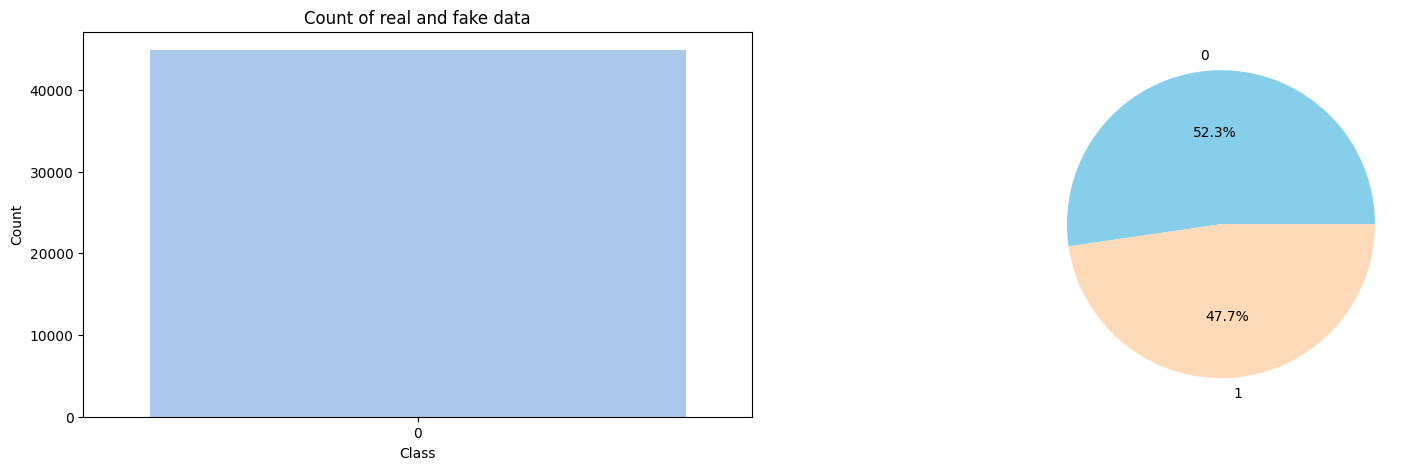

In [18]:
print(df_merge["Class"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df_merge.Class,ax=ax[0],palette="pastel")
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Class")
g2 = plt.pie(df_merge["Class"].value_counts().values,explode=[0,0],labels=df_merge.Class.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

2.Distribution of The Subject According to Real and Fake Data

subject
politicsNews       11272
worldnews          10135
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          768
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

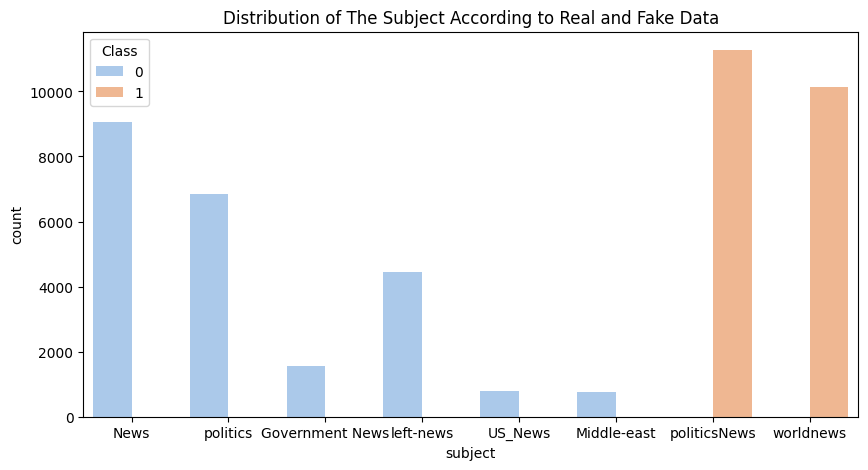

In [19]:
print(df_merge.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='Class', data=df_merge, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

Data Cleaning


Removing columns which are not required

In [20]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [21]:
df.isnull().sum()

text     0
Class    0
dtype: int64

Random Shuffling the dataframe

In [22]:
df = df.sample(frac = 1)
df.head()

,text,Class
9110,Jenna Fischer is best known for playing the ve...,0
17881,"Last week, President Trump made a public anno...",0
42788,WASHINGTON (Reuters) - U.S. President Donald T...,1
32495,WASHINGTON (Reuters) - U.S. House of Represent...,1
21790,This is like one big slush fund for Hillary 20...,0


Reset the index from Zero of the dataframe after reshuffling

In [23]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [24]:
df.columns

Index(['text', 'Class'], dtype='object')

In [25]:
df.head()

,text,Class
0,Jenna Fischer is best known for playing the ve...,0
1,"Last week, President Trump made a public anno...",0
2,WASHINGTON (Reuters) - U.S. President Donald T...,1
3,WASHINGTON (Reuters) - U.S. House of Represent...,1
4,This is like one big slush fund for Hillary 20...,0


Removal of HTML Contents,Punctuation Marks and Special Characters

In [26]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text
df["text"] = df["text"].apply(wordopt)

Let's make some visualization with new data.


1.WordCloud for Real News

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


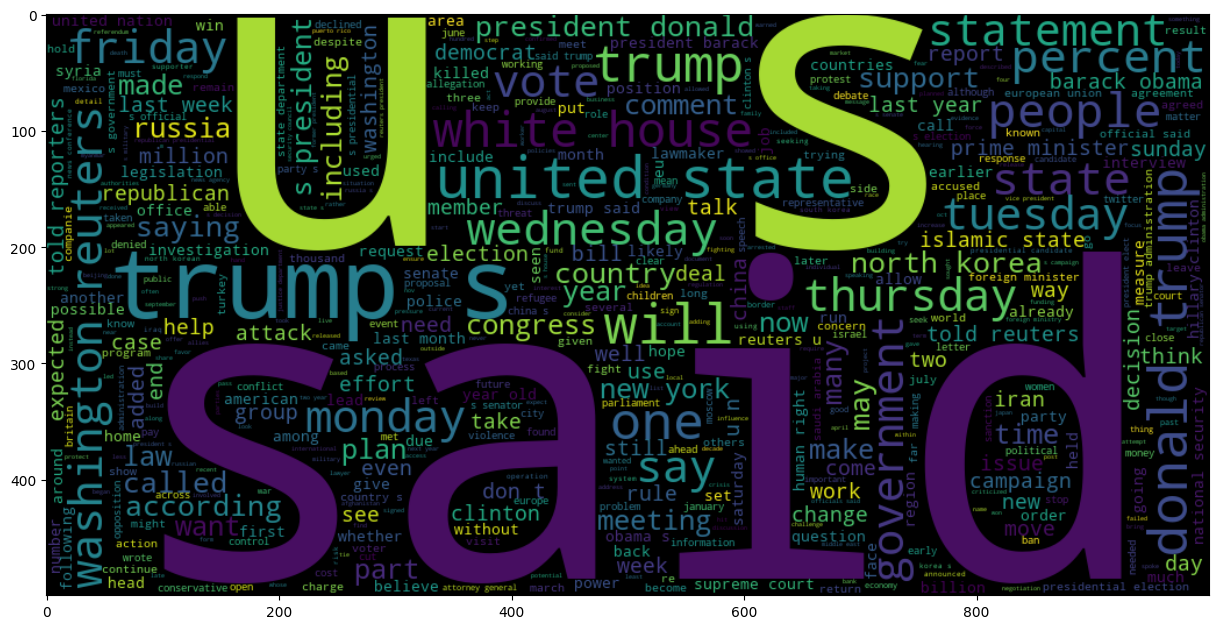

In [28]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.Class == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

2.WordCloud for Fake News

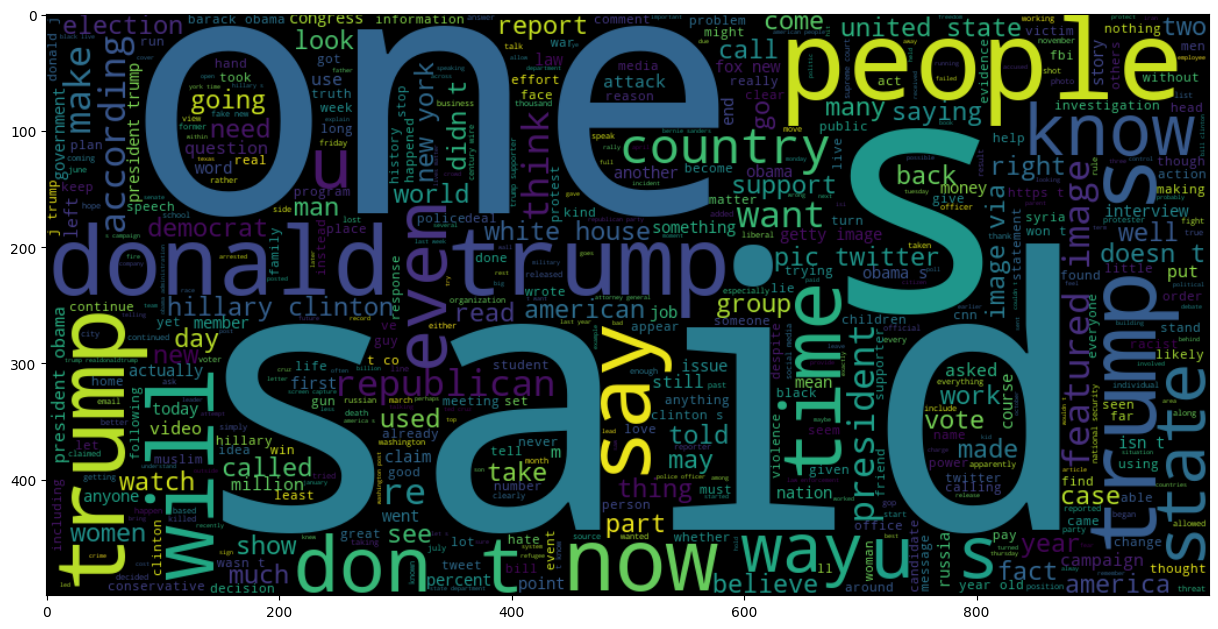

In [29]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.Class == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

Number of words in each text

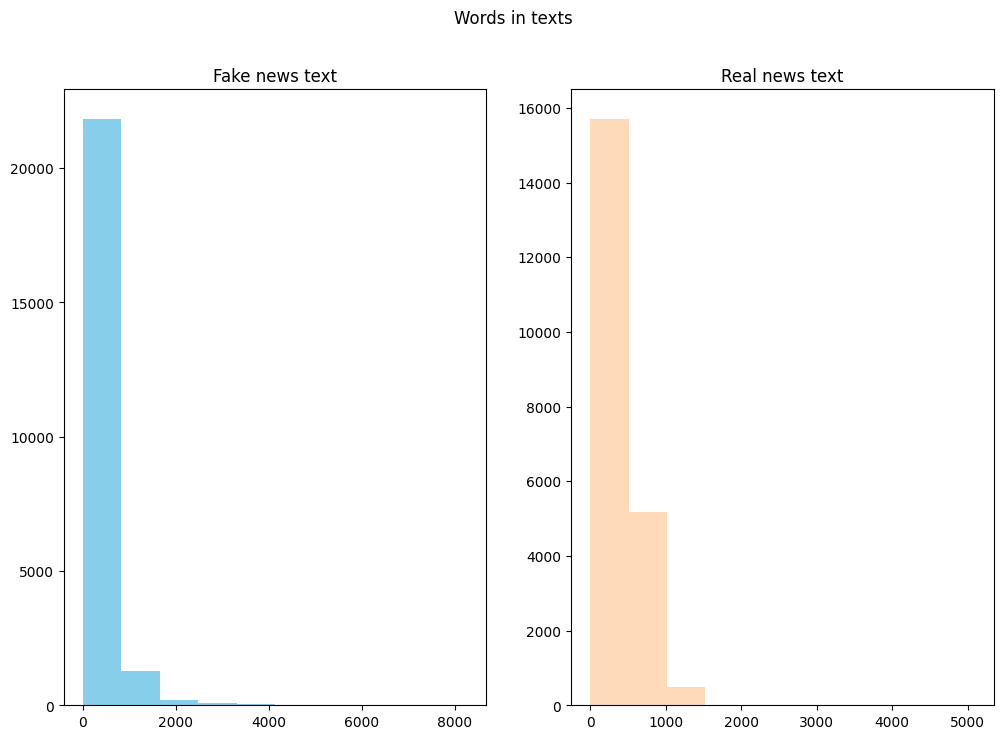

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['Class']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=df[df['Class']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

The number of words seems to be a bit different. 1000 words are most common in real news category while around 500 words are most common in fake news category

N-Gram Analysis
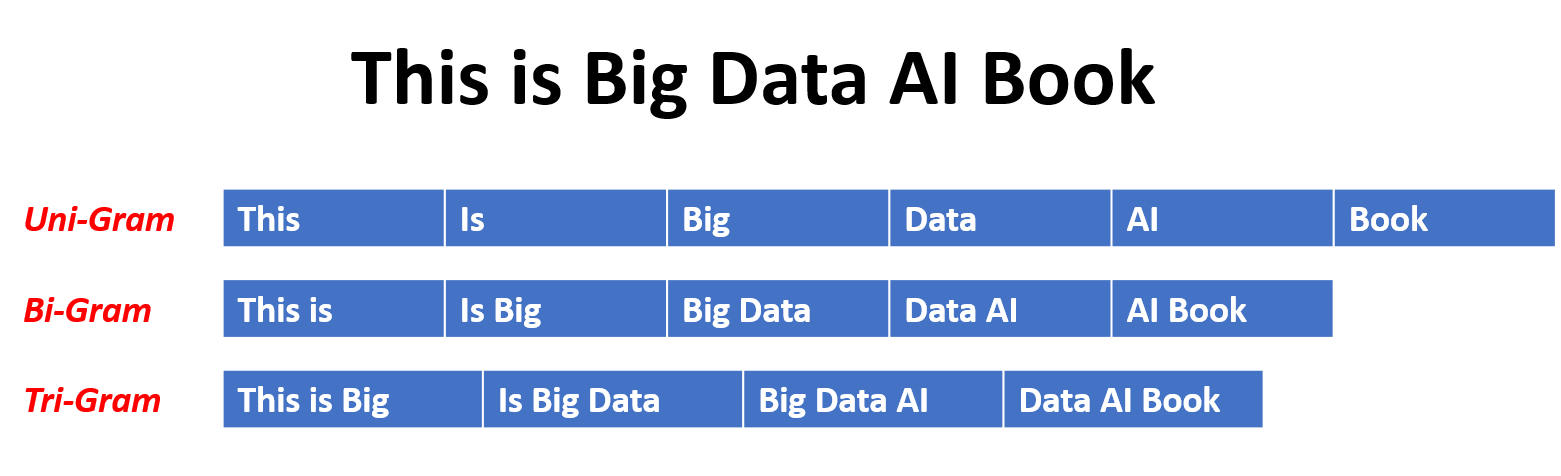

In [31]:
texts = ' '.join(df['text'])

In [32]:
string = texts.split(" ")

In [33]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

Unigram Analysis

     word    count
0     (,)  2919501
1  (the,)  1024686
2   (to,)   536014
3   (of,)   441378
4    (a,)   412994


<Axes: xlabel='count', ylabel='word'>

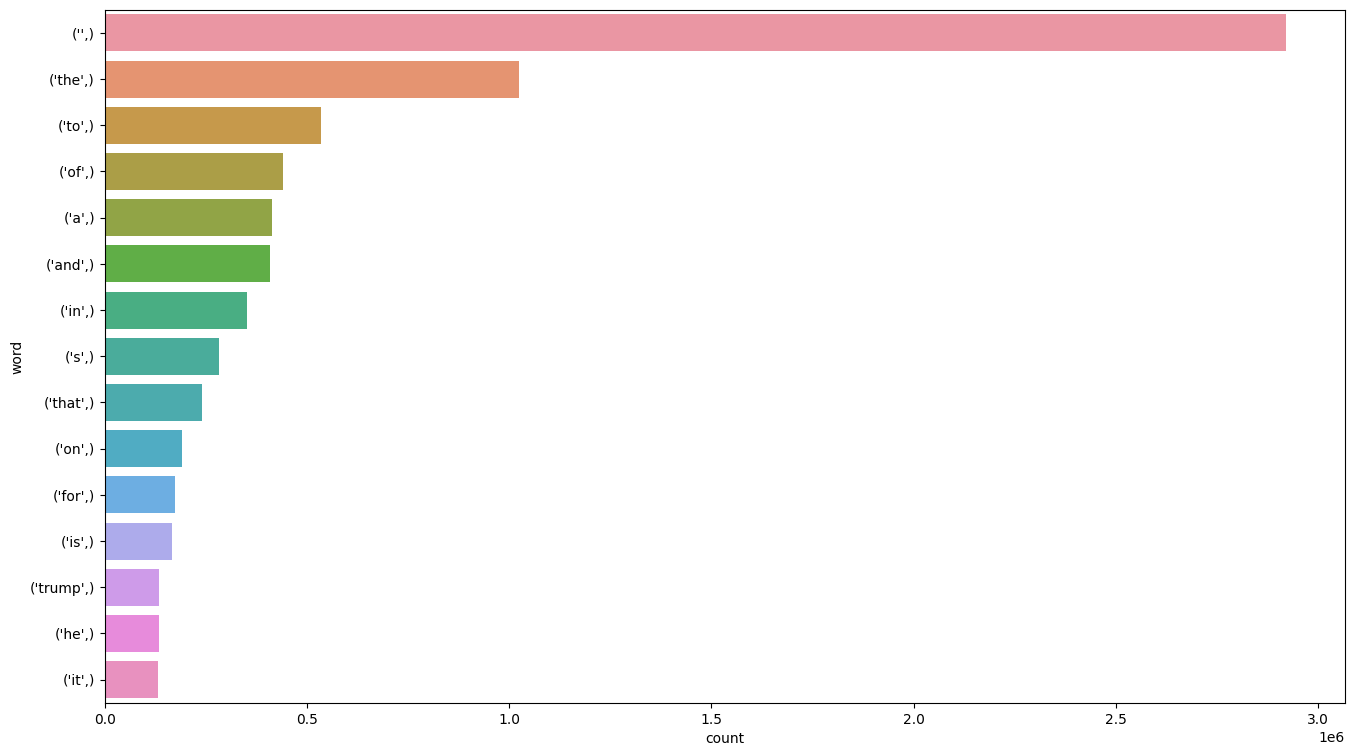

In [34]:
draw_n_gram(string,1)

Bigram Analysis

     word    count
0     (,)  2919501
1  (the,)  1024686
2   (to,)   536014
3   (of,)   441378
4    (a,)   412994


<Axes: xlabel='count', ylabel='word'>

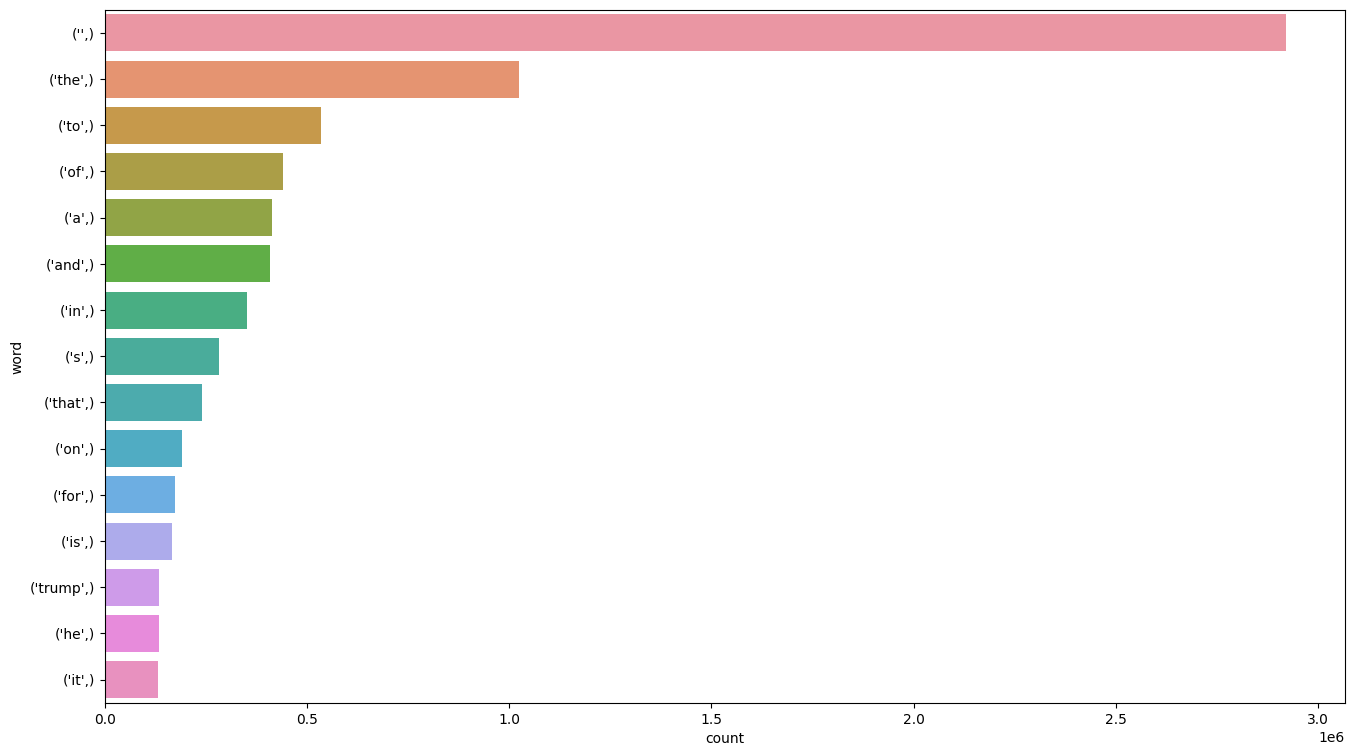

In [35]:
draw_n_gram(string,1)

Bigram Analysis

        word   count
0       (, )  713863
1    (, the)  158162
2  (of, the)  101189
3    (, and)   87593
4  (in, the)   80715


<Axes: xlabel='count', ylabel='word'>

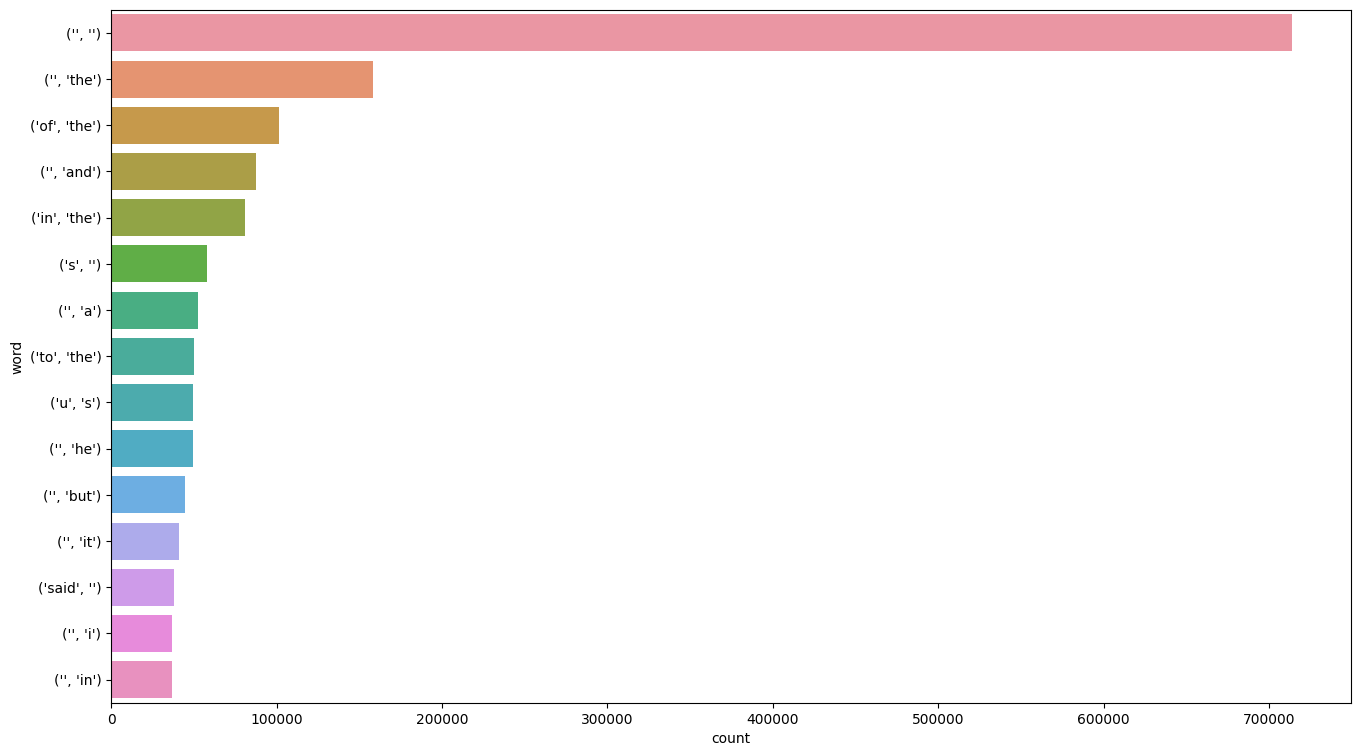

In [36]:
draw_n_gram(string,2)

Trigram Analysis

In [ ]:
draw_n_gram(string,3)

Defining dependent and independent variables

In [ ]:
x = df["text"]
y = df["Class"]

Splitting Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
print(f"Number of Training dataset: {x_train.shape[0]}\nNumber of Testing dataset: {x_test.shape[0]}")

Number of Training dataset: 33658
Number of Testing dataset: 11220


Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

Training The Models

In [ ]:

def train(model, model_name):
    model.fit(xv_train, y_train)
    model_train_score = model.score(xv_train, y_train)
    model_test_score = model.score(xv_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    Y_pred = model.predict(xv_test)
    cm = confusion_matrix(y_test, Y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f');
    
def class_report(model):
    Y_pred = model.predict(xv_test)
    print(classification_report(y_test, Y_pred))
    
def roc(model, model_name):
    Y_pred_svm = model.decision_function(xv_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, Y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

Classification with Accuracy

Logistic Regression

In [ ]:

log_model = LogisticRegression()
train(log_model, "Logistic Regression")

Logistic Regression model score on Training data: 99.09085507160259%
Logistic Regression model score on Testing data: 98.85026737967915%


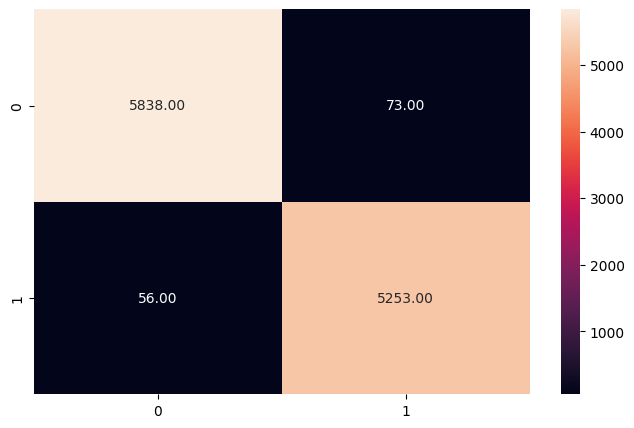

In [ ]:
conf_matrix(log_model)

In [ ]:
class_report(log_model)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5911
           1       0.99      0.99      0.99      5309

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



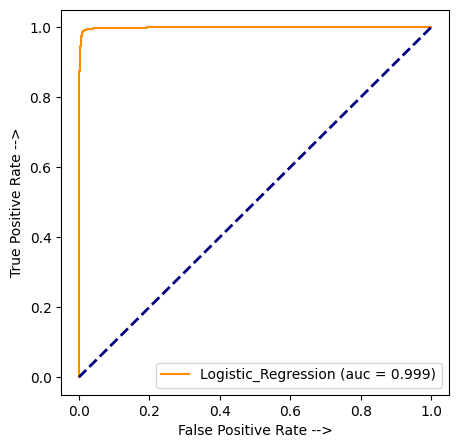

In [ ]:
roc(log_model, 'Logistic_Regression')

DecisionTree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
train(dt_model, "Decision_Tree")

Decision_Tree model score on Training data: 99.99702893814249%
Decision_Tree model score on Testing data: 99.62566844919786%


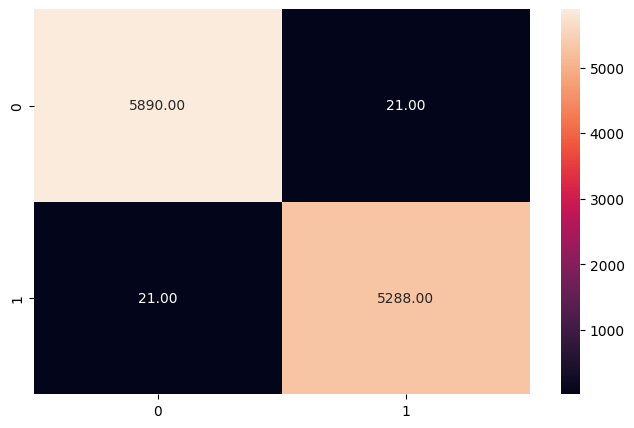

In [ ]:
conf_matrix(dt_model)

In [ ]:
class_report(dt_model)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5911
           1       1.00      1.00      1.00      5309

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



GradientBoosting Classifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
train(GBC, "GradientBoostingClassifier")


GradientBoostingClassifier model score on Training data: 99.67912531938914%
GradientBoostingClassifier model score on Testing data: 99.55436720142602%


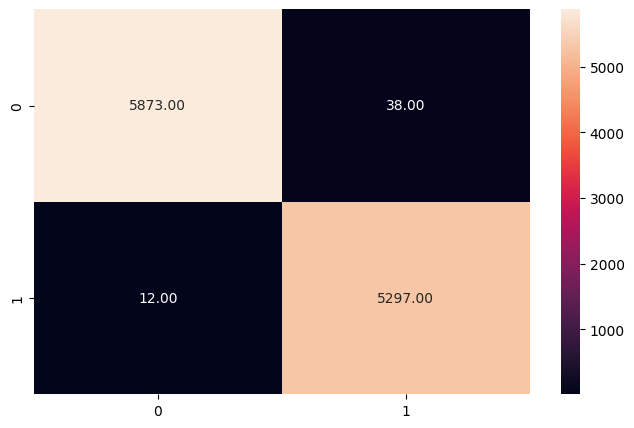

In [ ]:
conf_matrix(GBC)

In [ ]:
class_report(GBC)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5911
           1       0.99      1.00      1.00      5309

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



RandomForest Classifier

In [ ]:
rf_model = RandomForestClassifier()
train(rf_model, "Random_Forest")

Random_Forest model score on Training data: 99.99702893814249%
Random_Forest model score on Testing data: 98.97504456327985%


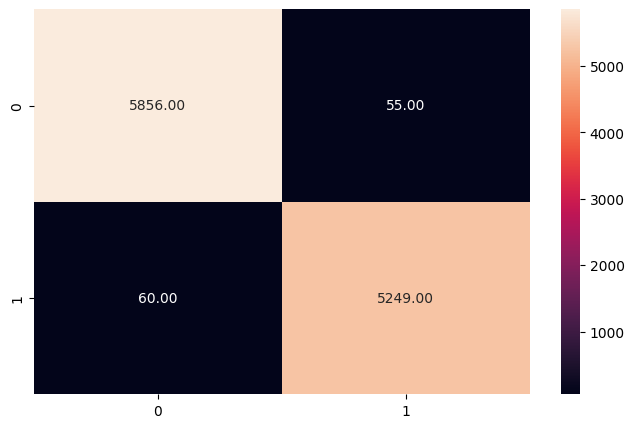

In [ ]:
conf_matrix(rf_model)

In [ ]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5911
           1       0.99      0.99      0.99      5309

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



SVM Model

In [ ]:
svm_model = SVC()
train(svm_model, 'SV_classifier')

SV_classifier model score on Training data: 99.90789708241725%
SV_classifier model score on Testing data: 99.349376114082%


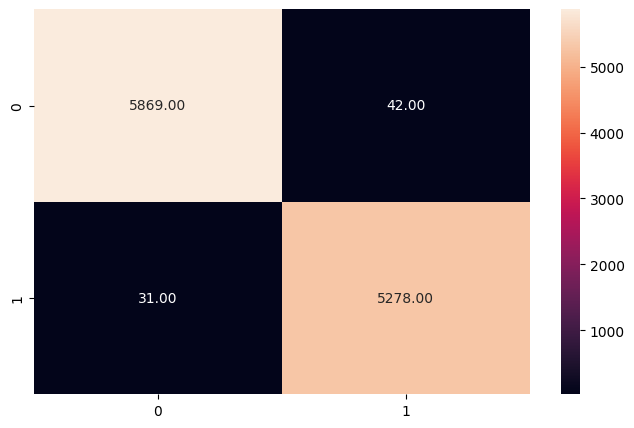

In [ ]:
conf_matrix(svm_model)

In [ ]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5911
           1       0.99      0.99      0.99      5309

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



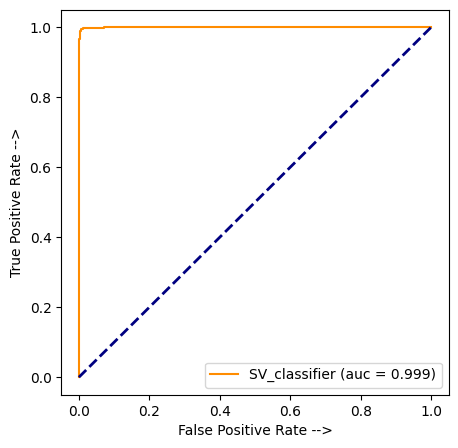

In [ ]:
roc(svm_model, 'SV_classifier')

Conclusion 
Highest Accuracy comes out to be from Decision Tree  Model which is 99.99702893814249% 

Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = log_model.predict(new_xv_test)
    pred_DT = dt_model.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = rf_model.predict(new_xv_test)
    pred_SVM=svm_model.predict(new_xv_test)
    
    

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {} \nKNN Prediction: {} \nNaive Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_SVM[0])))
                                                                                                              
                                                                            

In [1]:
news = str(input())
print(news)
manual_testing(news)

NameError: name 'manual_testing' is not defined

In [ ]:
news = str(input())
print(news)
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [ ]:
news = str(input())
print(news)
manual_testing(news)



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
